In [1]:
# pandas for dealing with DataFrames
import pandas as pd
# numpy for using mathematical functions
import numpy as np
# matplotlib for visualization
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

## Reading stocks data downloaded in the previous step

In [40]:
stocks = pd.read_csv("stocks_spy_data.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [41]:
stocks.head()

Adj Close                                                       \
                    A       AAL        AAP      AAPL ABBV        ABC  ABMD   
Date                                                                         
2010-01-04  20.182621  4.496877  38.154903  6.544688  NaN  22.101797  8.74   
2010-01-05  19.963375  5.005957  37.928116  6.556004  NaN  21.944105  8.53   
2010-01-06  19.892447  4.798555  38.258835  6.451721  NaN  21.736616  8.40   
2010-01-07  19.866661  4.939965  38.249397  6.439795  NaN  21.388035  8.40   
2010-01-08  19.860210  4.845691  38.400570  6.482610  NaN  21.620428  8.23   

                                             ...     Volume             \
                  ABT        ACN       ADBE  ...       WYNN        XEL   
Date                                         ...                         
2010-01-04  19.778837  33.334301  37.090000  ...  4741400.0  2670400.0   
2010-01-05  19.619041  33.540310  37.700001  ...  5644300.0  4321400.0   
2010-01-06  19.727999  33.896866  37.619999  ...  2738800.0  2164500.0   
2010-01-07  19.891426  33.865170  36.889999  ...  2388500.0  3041700.0   
2010-01-08  19.993120  33.730465  36.689999  ...  1539800.0  1599100.0   

                                                                       \
                   XOM       XRAY XYL        YUM        ZBH      ZBRA   
Date                                                                    
2010-01-04  27809100.0  1051400.0 NaN  2962274.0   805872.0  168800.0   
2010-01-05  30174700.0   763400.0 NaN  3298757.0  1769643.0  168800.0   
2010-01-06  35044700.0  1595100.0 NaN  4178981.0  1315619.0  385300.0   
2010-01-07  27192100.0  1096100.0 NaN  2452472.0  1734005.0  183600.0   
2010-01-08  24891800.0   803600.0 NaN  3772392.0  2213985.0  266500.0   

                            
                  ZION ZTS  
Date                        
2010-01-04   3974600.0 NaN  
2010-01-05   5605500.0 NaN  
2010-01-06  12615200.0 NaN  
2010-01-07  24716800.0 NaN  
2010-01-08   6903000.0 NaN  

[5 rows x 3030 columns]

In [42]:
# Reducing the DataFrame by keeping only the Adjusted Close Column as we only have to use that in this section 
# to Calculate the Annual Returns and Annual std
stocks = stocks['Adj Close']

In [43]:
stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.182621,4.496877,38.154903,6.544688,NaN,22.101797,8.74,19.778837,33.334301,37.090000,...,42.508530,13.786248,43.185627,32.782581,NaN,18.794689,53.299198,28.670000,11.376088,NaN
2010-01-05,19.963375,5.005957,37.928116,6.556004,NaN,21.944105,8.53,19.619041,33.540310,37.700001,...,45.093864,13.622756,43.354244,32.392876,NaN,18.730406,54.986431,28.620001,11.777194,NaN
2010-01-06,19.892447,4.798555,38.258835,6.451721,NaN,21.736616,8.40,19.727999,33.896866,37.619999,...,44.502361,13.648920,43.728966,32.606281,NaN,18.596510,54.968670,28.400000,12.801298,NaN
2010-01-07,19.866661,4.939965,38.249397,6.439795,NaN,21.388035,8.40,19.891426,33.865170,36.889999,...,45.452759,13.590055,43.591572,33.033108,NaN,18.591158,56.229664,27.690001,14.235043,NaN
2010-01-08,19.860210,4.845691,38.400570,6.482610,NaN,21.620428,8.23,19.993120,33.730465,36.689999,...,45.127102,13.596595,43.416714,33.033108,NaN,18.596510,55.048595,27.600000,14.004617,NaN


In [44]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3093 entries, 2010-01-04 to 2022-04-08
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 11.9 MB


In [45]:
# # Drop the top level Adj. Close
# stocks = stocks.droplevel(0, axis=1)

In [46]:
stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.182621,4.496877,38.154903,6.544688,NaN,22.101797,8.74,19.778837,33.334301,37.090000,...,42.508530,13.786248,43.185627,32.782581,NaN,18.794689,53.299198,28.670000,11.376088,NaN
2010-01-05,19.963375,5.005957,37.928116,6.556004,NaN,21.944105,8.53,19.619041,33.540310,37.700001,...,45.093864,13.622756,43.354244,32.392876,NaN,18.730406,54.986431,28.620001,11.777194,NaN
2010-01-06,19.892447,4.798555,38.258835,6.451721,NaN,21.736616,8.40,19.727999,33.896866,37.619999,...,44.502361,13.648920,43.728966,32.606281,NaN,18.596510,54.968670,28.400000,12.801298,NaN
2010-01-07,19.866661,4.939965,38.249397,6.439795,NaN,21.388035,8.40,19.891426,33.865170,36.889999,...,45.452759,13.590055,43.591572,33.033108,NaN,18.591158,56.229664,27.690001,14.235043,NaN
2010-01-08,19.860210,4.845691,38.400570,6.482610,NaN,21.620428,8.23,19.993120,33.730465,36.689999,...,45.127102,13.596595,43.416714,33.033108,NaN,18.596510,55.048595,27.600000,14.004617,NaN


In [47]:
# for simple reasons just doing the remaining analysis on the first ten columns, 
# if everything works out then I will do the analysis with all the columns
stocks_ten = stocks.iloc[0:,0:10]
stocks_ten

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE
Date,,,,,,,,,,
2010-01-04,20.182621,4.496877,38.154903,6.544688,NaN,22.101797,8.740000,19.778837,33.334301,37.090000
2010-01-05,19.963375,5.005957,37.928116,6.556004,NaN,21.944105,8.530000,19.619041,33.540310,37.700001
2010-01-06,19.892447,4.798555,38.258835,6.451721,NaN,21.736616,8.400000,19.727999,33.896866,37.619999
2010-01-07,19.866661,4.939965,38.249397,6.439795,NaN,21.388035,8.400000,19.891426,33.865170,36.889999
2010-01-08,19.860210,4.845691,38.400570,6.482610,NaN,21.620428,8.230000,19.993120,33.730465,36.689999
...,...,...,...,...,...,...,...,...,...,...
2022-04-04,134.809998,18.230000,211.919998,178.440002,161.889999,154.750000,325.700012,118.879997,344.470001,468.809998
2022-04-05,133.259995,17.840000,211.729996,175.059998,163.429993,155.759995,322.660004,119.480003,342.820007,458.579987
2022-04-06,132.710007,17.379999,212.830002,171.830002,168.910004,158.139999,313.760010,119.940002,340.260010,444.329987


In [48]:
# Saving the 
stocks.to_csv("stocks_spy_adj_close.csv")

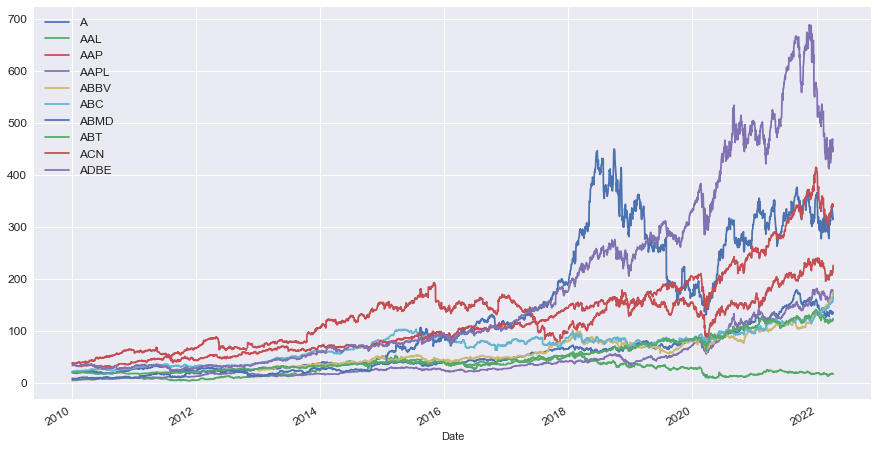

In [49]:
# as you can see the error before the figure is gone
stocks_ten.plot(figsize = (15,8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [50]:
# As you can see all the stocks are not starting from same y value, 
# lets normalize the data and then plot and see the price fluctuations
# we will divide every row by the first row and multiply by 100 to covert it into %
# for example the following code is printing the normalized values of first column
stocks_ten.iloc[1,0]/(stocks_ten.iloc[:,0])*100


Date
2010-01-04     98.913690
2010-01-05    100.000000
2010-01-06    100.356560
2010-01-07    100.486816
2010-01-08    100.519454
                 ...    
2022-04-04     14.808527
2022-04-05     14.980771
2022-04-06     15.042856
2022-04-07     14.686512
2022-04-08     14.801940
Name: A, Length: 3093, dtype: float64

In [51]:
stocks_ten.iloc[1]

A       19.963375
AAL      5.005957
AAP     37.928116
AAPL     6.556004
ABBV          NaN
ABC     21.944105
ABMD     8.530000
ABT     19.619041
ACN     33.540310
ADBE    37.700001
Name: 2010-01-05 00:00:00, dtype: float64

In [52]:
# Lets normalize all the columns
norm_close = stocks_ten/(stocks_ten.iloc[0])*100
norm_close

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE
Date,,,,,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-05,98.913690,111.320755,99.405614,100.172894,NaN,99.286520,97.597254,99.192087,100.618009,101.644650
2010-01-06,98.562256,106.708616,100.272393,98.579504,NaN,98.347732,96.109838,99.742965,101.687646,101.428953
2010-01-07,98.434495,109.853251,100.247659,98.397277,NaN,96.770569,96.109838,100.569239,101.592559,99.460769
2010-01-08,98.402534,107.756806,100.643866,99.051468,NaN,97.822037,94.164757,101.083395,101.188457,98.921538
...,...,...,...,...,...,...,...,...,...,...
2022-04-04,667.950895,405.392469,555.420088,2726.485912,NaN,700.169309,3726.544860,601.046442,1033.380005,1263.979498
2022-04-05,660.271005,396.719796,554.922112,2674.840902,NaN,704.739048,3691.762152,604.080018,1028.430167,1236.397910
2022-04-06,657.545949,386.490452,557.805112,2625.487967,NaN,715.507425,3589.931556,606.405732,1020.750397,1197.977850


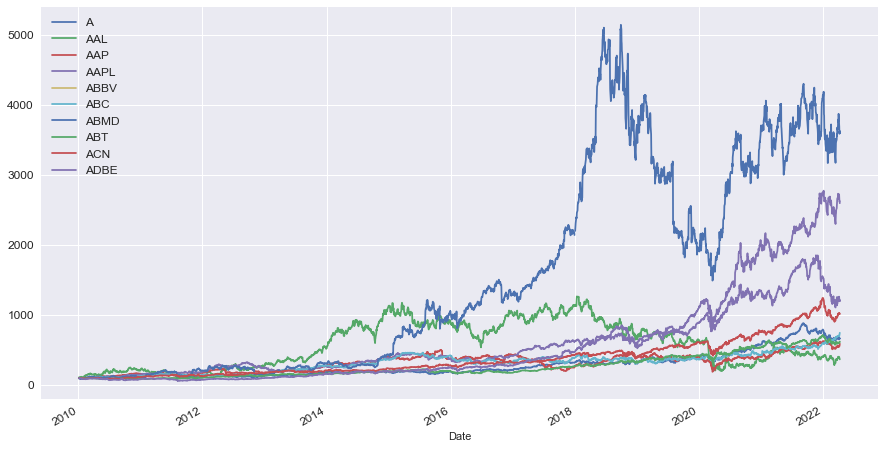

In [53]:
# Lets plot the normalized closed values
norm_close.plot(figsize = (15,8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [55]:
# Lets get the data for more tickers
returns = stocks_ten.pct_change().dropna()
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE
Date,,,,,,,,,,
2013-01-03,0.003581,-0.022890,0.000000,-0.012622,-0.008257,-0.002070,-0.017531,0.038066,-0.003620,-0.015389
2013-01-04,0.019748,0.078331,0.015589,-0.027855,-0.012633,0.006682,-0.002974,-0.006011,0.005522,0.010066
2013-01-07,-0.007233,0.007468,-0.003396,-0.005882,0.002036,0.003205,-0.011931,0.008165,-0.004336,-0.004983
2013-01-08,-0.007991,0.021563,-0.016355,0.002692,-0.021764,-0.001369,-0.003019,0.000300,0.005806,0.005272
2013-01-09,0.027008,-0.001979,0.003048,-0.015629,0.005637,0.000000,-0.028009,0.006596,0.007072,0.013634


In [56]:
returns.describe()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE
count,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000
mean,0.000804,0.000585,0.000704,0.001146,0.001000,0.000771,0.001721,0.000757,0.000860,0.001231
std,0.015579,0.031519,0.019902,0.017796,0.017252,0.016490,0.027374,0.014511,0.014500,0.019054
min,-0.110117,-0.252246,-0.203439,-0.128647,-0.162524,-0.130314,-0.285859,-0.097856,-0.102967,-0.147452
25%,-0.006748,-0.013702,-0.008157,-0.006928,-0.007215,-0.006579,-0.009824,-0.005913,-0.005533,-0.006924
50%,0.001221,0.000188,0.000393,0.000893,0.001413,0.001136,0.001664,0.000751,0.001332,0.001416
75%,0.009335,0.014929,0.009676,0.010226,0.009318,0.008830,0.014669,0.008326,0.007715,0.010228
max,0.098394,0.410970,0.165575,0.119808,0.137673,0.118151,0.292778,0.109360,0.128573,0.177193


In [57]:
# Transpose it
returns.describe().T

,count,mean,std,min,25%,50%,75%,max
A,2337.0,0.000804,0.015579,-0.110117,-0.006748,0.001221,0.009335,0.098394
AAL,2337.0,0.000585,0.031519,-0.252246,-0.013702,0.000188,0.014929,0.410970
AAP,2337.0,0.000704,0.019902,-0.203439,-0.008157,0.000393,0.009676,0.165575
AAPL,2337.0,0.001146,0.017796,-0.128647,-0.006928,0.000893,0.010226,0.119808
ABBV,2337.0,0.001000,0.017252,-0.162524,-0.007215,0.001413,0.009318,0.137673
ABC,2337.0,0.000771,0.016490,-0.130314,-0.006579,0.001136,0.008830,0.118151
ABMD,2337.0,0.001721,0.027374,-0.285859,-0.009824,0.001664,0.014669,0.292778
ABT,2337.0,0.000757,0.014511,-0.097856,-0.005913,0.000751,0.008326,0.109360
ACN,2337.0,0.000860,0.014500,-0.102967,-0.005533,0.001332,0.007715,0.128573
ADBE,2337.0,0.001231,0.019054,-0.147452,-0.006924,0.001416,0.010228,0.177193


In [59]:
# Lets extract the mean and std column from the returns DataFrame
risk_return = returns.describe().T.loc[:,["mean", "std"]]
risk_return

,mean,std
A,0.000804,0.015579
AAL,0.000585,0.031519
AAP,0.000704,0.019902
AAPL,0.001146,0.017796
ABBV,0.001000,0.017252
ABC,0.000771,0.016490
ABMD,0.001721,0.027374
ABT,0.000757,0.014511
ACN,0.000860,0.014500
ADBE,0.001231,0.019054


In [60]:
risk_return['mean'] = risk_return['mean'] * 252
risk_return

,mean,std
A,0.202669,0.015579
AAL,0.147494,0.031519
AAP,0.177522,0.019902
AAPL,0.288840,0.017796
ABBV,0.252120,0.017252
ABC,0.194275,0.016490
ABMD,0.433623,0.027374
ABT,0.190881,0.014511
ACN,0.216600,0.014500
ADBE,0.310209,0.019054


In [61]:
risk_return['std'] = risk_return['std'] * np.sqrt(252)
risk_return

,mean,std
A,0.202669,0.247317
AAL,0.147494,0.500343
AAP,0.177522,0.315935
AAPL,0.288840,0.282496
ABBV,0.252120,0.273861
ABC,0.194275,0.261775
ABMD,0.433623,0.434550
ABT,0.190881,0.230348
ACN,0.216600,0.230181
ADBE,0.310209,0.302469


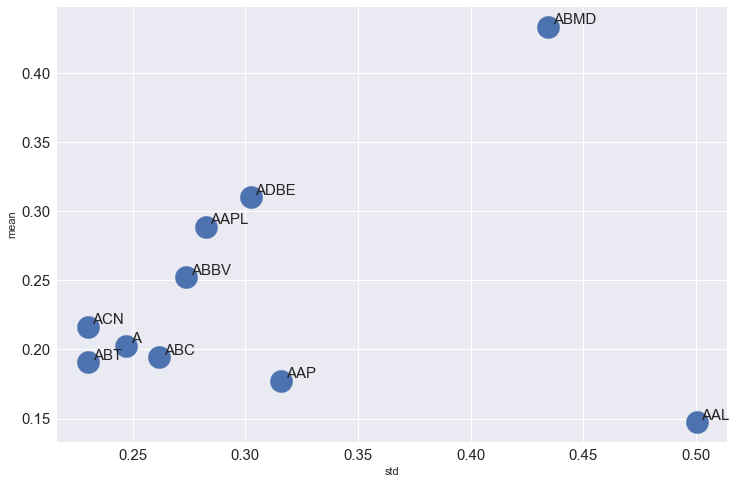

In [62]:
# Lets annotate the graph by representing which dot is which company
risk_return.plot.scatter(x = "std", y = "mean", figsize = (12, 8), s = 500, fontsize = 15)
for i in risk_return.index:
  plt.annotate(i,xy = (risk_return.loc[i,"std"]+0.002, risk_return.loc[i,"mean"]+0.002), size = 15)